# Objective

The primary objective of this analysis is to implement the data mining techniques on a credit approval dataset. Its features are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>.

## 1. Look into the dataset

In [1]:
# Define the header constant
COLS_NAME = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel' , 'Ethnicity', 'YearsEmployed', 'PriorDefault','Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']

In [2]:
# Import pandas
import pandas as pd
# Import numpy
import numpy as np
%matplotlib inline
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset 
credit_card_df = pd.read_csv('datasets/credit_card_approvals.data', names=COLS_NAME)
# Inspect the ten first rows
credit_card_df.head(10)

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83   0.000       u            g              w         v   
1      a  58.67   4.460       u            g              q         h   
2      a  24.50   0.500       u            g              q         h   
3      b  27.83   1.540       u            g              w         v   
4      b  20.17   5.625       u            g              w         v   
5      b  32.08   4.000       u            g              m         v   
6      b  33.17   1.040       u            g              r         h   
7      a  22.92  11.585       u            g             cc         v   
8      b  54.42   0.500       y            p              k         h   
9      b  42.50   4.915       y            p              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0          1.250            t        t            1              f       g   
1          3.040            t        t            6              f       g   
2          1.500            t        f            0              f       g   
3          3.750            t        t            5              t       g   
4          1.710            t        f            0              f       s   
5          2.500            t        f            0              t       g   
6          6.500            t        f            0              t       g   
7          0.040            t        f            0              f       g   
8          3.960            t        f            0              f       g   
9          3.165            t        f            0              t       g   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +  
5   00360       0              +  
6   00164   31285              +  
7   00080    1349              +  
8   00180     314              +  
9   00052    1442              +

In [3]:
# The shape of the dataset
credit_card_df.shape

(690, 16)

In [4]:
# Inspect the ten last rows
credit_card_df.tail(10)

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
680      b  19.50   0.290       u            g              k         v   
681      b  27.83   1.000       y            p              d         h   
682      b  17.08   3.290       u            g              i         v   
683      b  36.42   0.750       y            p              d         v   
684      b  40.58   3.290       u            g              m         v   
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
680          0.290            f        f            0              f       g   
681          3.000            f        f            0              f       g   
682          0.335            f        f            0              t       g   
683          0.585            f        f            0              f       g   
684          3.500            f        f            0              t       s   
685          1.250            f        f            0              f       g   
686          2.000            f        t            2              t       g   
687          2.000            f        t            1              t       g   
688          0.040            f        f            0              f       g   
689          8.290            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
680   00280     364              -  
681   00176     537              -  
682   00140       2              -  
683   00240       3              -  
684   00400       0              -  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -

In [5]:
# Inspect columns dtype
credit_card_df.info()
# We can see here that 'Age' dtype is object instead of float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [6]:
# Convert 'Age' from object to float64
credit_card_df['Age']= pd.to_numeric(credit_card_df['Age'].str.replace(",", ""), errors='coerce')

In [7]:
# Inspect columns dtype
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


In [8]:
# Print summary statistics
credit_card_df.describe()

Age        Debt  YearsEmployed  CreditScore         Income
count  678.000000  690.000000     690.000000    690.00000     690.000000
mean    31.568171    4.758725       2.223406      2.40000    1017.385507
std     11.957862    4.978163       3.346513      4.86294    5210.102598
min     13.750000    0.000000       0.000000      0.00000       0.000000
25%     22.602500    1.000000       0.165000      0.00000       0.000000
50%     28.460000    2.750000       1.000000      0.00000       5.000000
75%     38.230000    7.207500       2.625000      3.00000     395.500000
max     80.250000   28.000000      28.500000     67.00000  100000.000000

In [9]:
# Find numerical columns
numerical_columns = credit_card_df.select_dtypes(include=np.number)
# Find categorical columns
categorical_columns = credit_card_df.select_dtypes(exclude=np.number)
# Print the numerical and categorical columns numbers
print('There are '+str(numerical_columns.shape[1]) +' numerical columns')
print('There are '+str(categorical_columns.shape[1]) +' categorical columns')

There are 5 numerical columns
There are 11 categorical columns


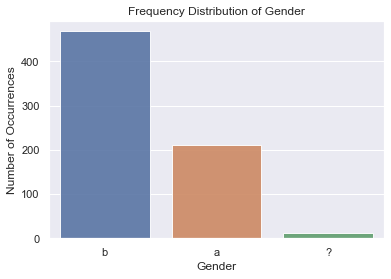

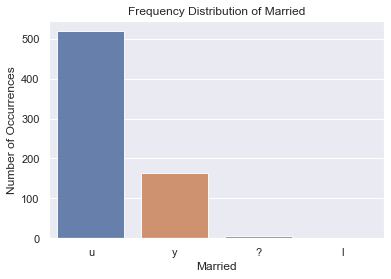

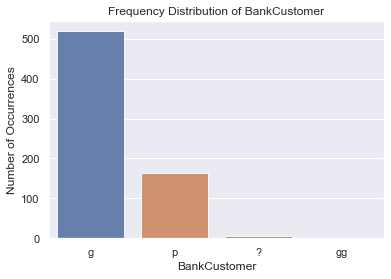

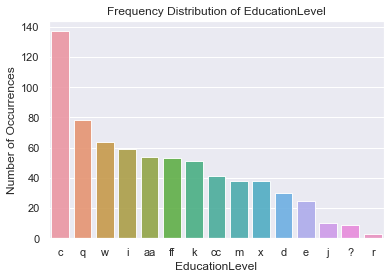

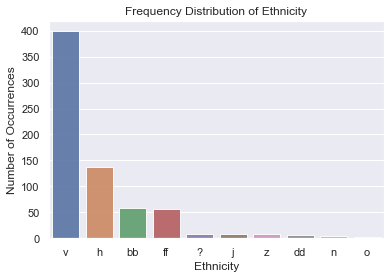

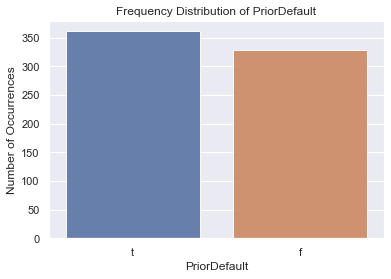

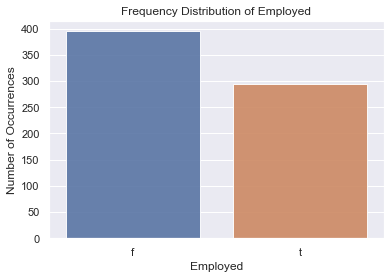

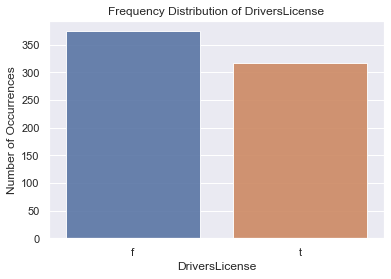

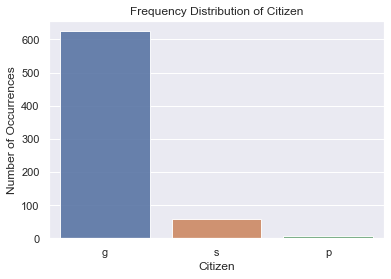

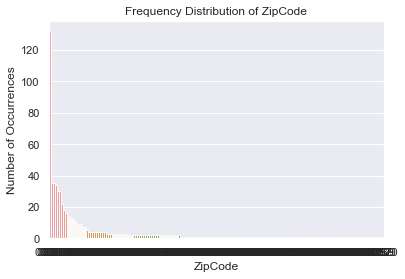

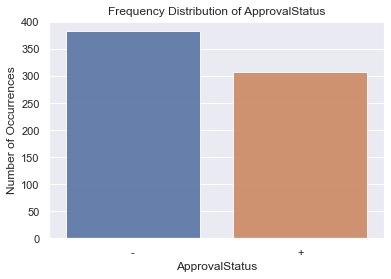

In [10]:
# Visual exploration of categorical features
for col in categorical_columns:
    col_count = credit_card_df[col].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(col_count.index, col_count.values, alpha=0.9)
    plt.title('Frequency Distribution of '+col)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()

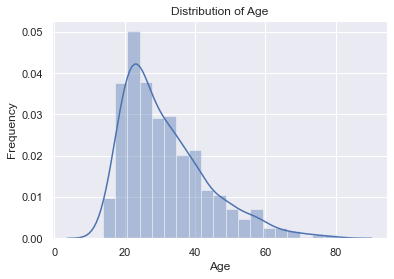

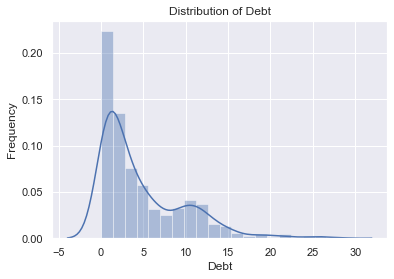

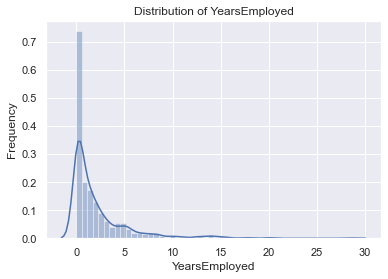

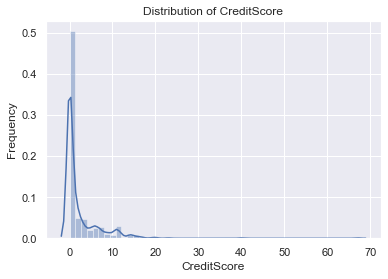

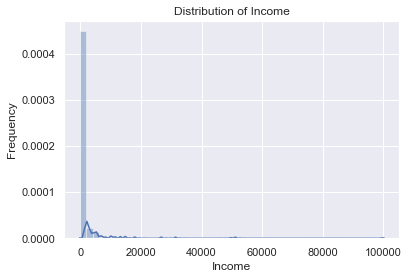

In [11]:
# Visual exploration of numerical features
for col in numerical_columns:
    sns.set(style='darkgrid')
    sns.distplot(credit_card_df[col])
    plt.title('Distribution of '+col)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()

## 2. Handling the missing values
While exploring the categorical features, we saw that, some features are labeled with '?'. They are missing values. 
Here we imputed the values by using the median value for Numerical features. For remaining features with categorical values, the missing values are imputed using the frequency count of the observations. The Class group with highest frequency is used.

In [12]:
# Replace the '?'s with NaN
credit_card_df = credit_card_df.replace('?', np.nan)
# Count the number of NaNs in the dataset to verify
credit_card_df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

For numerical features we are going to impute the missing values with a strategy called mean imputation.

In [13]:
# Impute the missing values with mean imputation
credit_card_df.fillna(credit_card_df.mean(), inplace=True)

# Count the number of NaNs in the dataset to verifycredit_card_df
credit_card_df.isnull().sum()

Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

For categorical features we are going to impute these missing values with the most frequent values as present in the respective columns

In [14]:
# Iterate over each column of each categorical column 
for col in categorical_columns:
    # Impute with the most frequent value
    credit_card_df = credit_card_df.fillna(credit_card_df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
credit_card_df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 3. Data preprocessing

Before fitting our data into a machine learing model, we need to drop features that are note important like features like <code>DriversLicense</code> and <code>ZipCode</code> and convert the non-numeric data into numeric.

In [15]:
# Drop 'DriversLicense' and 'ZipCode' columns
credit_card_df = credit_card_df.drop(['DriversLicense', 'ZipCode'], axis=1)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le =  LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in credit_card_df.columns:
    # Compare if the dtype is object
    if credit_card_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        credit_card_df[col]=le.fit_transform(credit_card_df[col])

## 4. Splitting the dataset into train and test sets

Now we are going to split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing.

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Convert the dataset into numpy array
credit_card_df = credit_card_df.to_numpy()

# Segregate features and labels into separate variables
X, y = credit_card_df[:,0:13] , credit_card_df[:, 13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

## 5. Data Normalization

As machine learning algorithms perform better when numerical input variables are scaled. We are going to scale our dataset using normalization. Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

In [17]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

## 6. Fitting a logistic regression model to the train set
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 


In [18]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaled_X_train, y_train)

LogisticRegression()

## 7. Making predictions and evaluating performance


In [19]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaled_X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaled_X_test, y_test))


Accuracy of logistic regression classifier:  0.8421052631578947


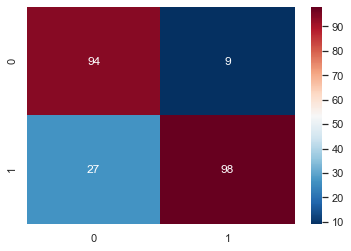

In [20]:
# Print the confusion matrix of the logreg model
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='RdBu_r', annot=True, )

## 8. Improve the accuracy ot the model with Grid Search
Grid search is a technique to hyperparameter tuning that examines all possible combinations of hyperparameters

In [21]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
# Tolerance for stopping criteria
tol = [0.01, 0.001, 0.0001]
# Maximum number of iterations taken for the solvers to converge
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

## 9. Finding the best model
After the grid search runs, we obtain the best model found during the search.

In [22]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaled_X
rescaled_X = scaler.fit_transform(X)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaled_X, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}
